<a href="https://colab.research.google.com/github/Geeth-Rath/Rice_Plant_Diseases_Detection/blob/rice_plant_nutrients_defficiency/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [4]:
import cv2
import numpy as np
import os
from skimage import exposure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte


In [5]:
img_no = 1
x = []
y = []
z = []
histo = []


In [6]:
import cv2

def rotate_image_upside(image):

    # Check the image orientation

    height, width = image.shape[:2]
   
    if height > width: 
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    else:
        print("width", image.shape)
        rotated_image = image

    return rotated_image


In [ ]:
(2000, 200, 3)
height (289, 3757)
height (364, 4028)
width (3690, 327)
width (3830, 280)

In [7]:


classes = {'Nitrogen(N)': 0 , 'Phosphorus(P)': 1, 'Potassium(K)': 2}

for cls in classes:
    pth = '/content/drive/MyDrive/colab/dataset/rice_plant_lacks_nutrients/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        
        # img = rotate_image_upside(img)

        #  # Resize
        resizedImage = cv2.resize(img, (200, 2000))
        
        # Contrast improve
        color_contrastImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Histogram equalization
        hist_eq_image = cv2.cvtColor(color_contrastImage, cv2.COLOR_RGB2Lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        hist_eq_image[:, :, 0] = clahe.apply(hist_eq_image[:, :, 0])
        hist_eq_image = cv2.cvtColor(hist_eq_image, cv2.COLOR_Lab2RGB)
        
        # Gamma correction
        gamma = 1.5
        gamma_corrected = cv2.pow(hist_eq_image/255.0, gamma)
        gamma_corrected = (gamma_corrected * 255).astype('uint8')
        
        # Smooth image
        smooth_image = cv2.GaussianBlur(gamma_corrected, (7, 7), 0, borderType=cv2.BORDER_CONSTANT)
        
        # Save the preprocessed image in the class directory
        # cv2.imwrite(pth + '/' + str(img_no) + '.jpg', smooth_image)
        
        # Append modified images to the respective lists
        img_no += 1
        x.append(smooth_image)
        y.append(classes[cls])
        z.append(img)



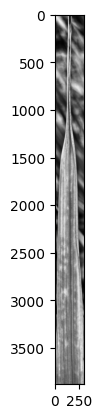

In [9]:
plt.imshow(x[10]) 

In [40]:
x[1].shape

(2000, 200, 3)

In [12]:
z[1].shape

(3215, 189)

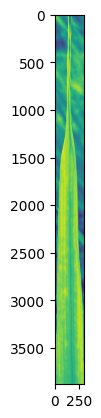

In [11]:
plt.imshow(z[10])  